# WeatherPy
----

### Observation 1
The maximum temperature recorded for cities closer to the equator (between latitude -20 to 20) are much more higher than cities further from the equator. 

### Observation 2
The temperature gradually reduces and becomes colder the further the city is from the equator. The northern hemisphere has a steeper gradient of max temp vs latitude as compared to the southern hemisphere. 

### Observation 3
Cloudiness and wind speed of each city appear to be relatively even in distribution between all ranges of the latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []
counter = 1
set = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {counter} of Set {set} | {city}")
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter = counter + 1
        if counter == 51:
            set = set + 1
            counter = 1

    except KeyError:
        print(f"City not found. Skipping...")
        counter = counter + 1
        if counter == 51:
            set = set + 1
            counter = 1
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | pouebo
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | kishi
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | abu samrah
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | pasighat
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | tres lagoas
Processing Record 16 of Set 1 | thinadhoo
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | leshukonskoye
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | jalu
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | nizhneyansk
City not found. Skip

Processing Record 38 of Set 4 | cairns
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | nouadhibou
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | cangzhou
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | morant bay
Processing Record 47 of Set 4 | hofn
Processing Record 48 of Set 4 | macomb
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | san quintin
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | santa maria
Processing Record 4 of Set 5 | tisovec
Processing Record 5 of Set 5 | sao joao da barra
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | road town
Processing Record 9 of Set 5 | mehamn
Processing Record 10 of Set 5 | marsh harbour
Proc

Processing Record 27 of Set 8 | guerrero negro
Processing Record 28 of Set 8 | nantucket
Processing Record 29 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | sipe sipe
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | chervona sloboda
Processing Record 34 of Set 8 | lac du bonnet
Processing Record 35 of Set 8 | umm lajj
Processing Record 36 of Set 8 | vostok
Processing Record 37 of Set 8 | dandong
Processing Record 38 of Set 8 | kasongo-lunda
Processing Record 39 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 40 of Set 8 | nueva imperial
Processing Record 41 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 8 | dien bien
City not found. Skipping...
Processing Record 43 of Set 8 | tuy hoa
Processing Record 44 of Set 8 | morlaix
Processing Record 45 of Set 8 | norman wells
Processing Record 46 of Set 8 | faya
Processing Record 47 of Set

Processing Record 11 of Set 12 | xiongshi
City not found. Skipping...
Processing Record 12 of Set 12 | plouzane
Processing Record 13 of Set 12 | bumba
Processing Record 14 of Set 12 | mirante do paranapanema
Processing Record 15 of Set 12 | dire dawa
Processing Record 16 of Set 12 | santiago
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | ngunguru
Processing Record 19 of Set 12 | kassala
Processing Record 20 of Set 12 | nchelenge
Processing Record 21 of Set 12 | ciudad ojeda
Processing Record 22 of Set 12 | camana
Processing Record 23 of Set 12 | san patricio
Processing Record 24 of Set 12 | taperoa
Processing Record 25 of Set 12 | riyadh
Processing Record 26 of Set 12 | duz
City not found. Skipping...
Processing Record 27 of Set 12 | damietta
Processing Record 28 of Set 12 | mayya
Processing Record 29 of Set 12 | predivinsk
Processing Record 30 of Set 12 | nhamunda
Processing Record 31 of Set 12 | ahuimanu
Processing Record 32 of Set 12 | balkhash
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(city_dict)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,22.17,73,100,3.69,PF,1663126466
1,Pouébo,-20.4000,164.5667,25.42,67,37,0.66,NC,1663126466
2,Port Blair,11.6667,92.7500,29.02,74,75,5.14,IN,1663126466
3,Kisi,9.0833,3.8500,21.27,99,77,1.46,NG,1663126468
4,Mataura,-46.1927,168.8643,10.27,72,90,2.33,NZ,1663126468
...,...,...,...,...,...,...,...,...,...
538,Mangan,27.5167,88.5333,27.80,77,90,2.45,IN,1663126733
539,Lebanon,36.2081,-86.2911,21.03,87,0,0.00,US,1663126733
540,Champasak,14.7500,106.0000,24.49,69,81,1.31,LA,1663126733
541,Khorramshahr,30.4397,48.1664,29.98,94,0,3.09,IR,1663126733


In [5]:
city_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
hum_max = city_data["Humidity"].max()
print(f"The maximum humidity in this dataset is {hum_max}")

The maximum humidity in this dataset is 100


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

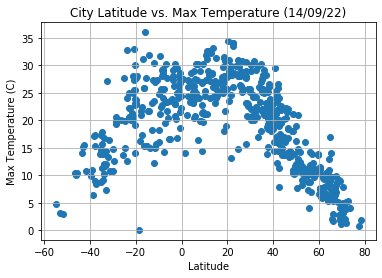

In [8]:
date = city_data['Date'].mean()
date_tuple = time.localtime(date)
datecov = time.strftime("%d/%m/%y", date_tuple)
plt.scatter(city_data['Lat'], city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({datecov})")
plt.savefig('output_data/Fig1.png')

## Latitude vs. Humidity Plot

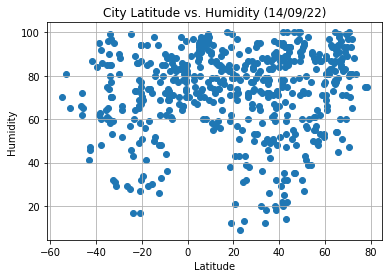

In [9]:
plt.scatter(city_data['Lat'], city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.title(f"City Latitude vs. Humidity ({datecov})")
plt.savefig('output_data/Fig2.png')

## Latitude vs. Cloudiness Plot

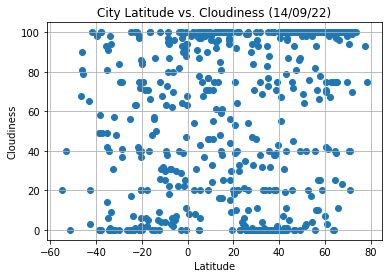

In [10]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datecov})")
plt.savefig('output_data/Fig3.png')

## Latitude vs. Wind Speed Plot

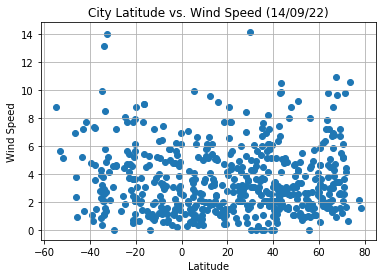

In [11]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datecov})")
plt.savefig('output_data/Fig4.png')

## Linear Regression

In [12]:
north_data = city_data[city_data["Lat"] > 0]
maxtemp_north = north_data["Max Temp"]
hum_north = north_data["Humidity"]
cloud_north = north_data["Cloudiness"]
wind_north = north_data["Wind Speed"]
north = north_data["Lat"]
south_data = city_data[city_data["Lat"] < 0]
maxtemp_south = south_data["Max Temp"]
hum_south = south_data["Humidity"]
cloud_south = south_data["Cloudiness"]
wind_south = south_data["Wind Speed"]
south = south_data["Lat"]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8335502195158431


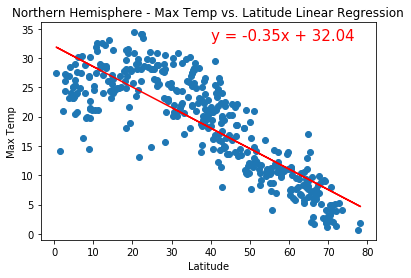

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north, maxtemp_north)
regress_values = north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north, maxtemp_north)
plt.plot(north, regress_values, "r-")
plt.annotate(line_eq,(40,33),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6829356320700178


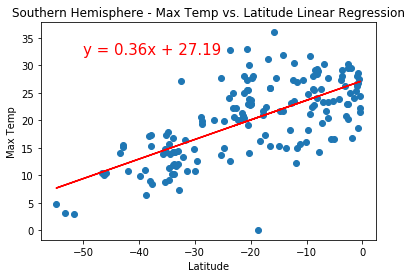

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south, maxtemp_south)
regress_values = south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south, maxtemp_south)
plt.plot(south, regress_values, "r-")
plt.annotate(line_eq,(-50,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig6.png')

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0034780086715011033


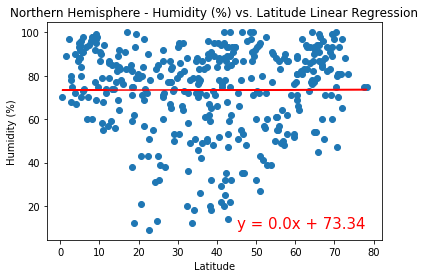

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north, hum_north)
regress_values = north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north, hum_north)
plt.plot(north, regress_values, "r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15100350423989717


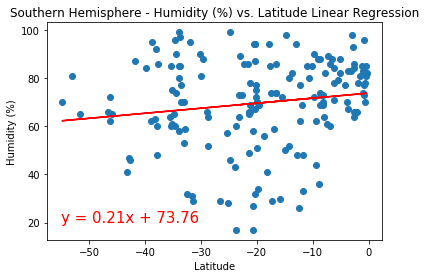

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south, hum_south)
regress_values = south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south, hum_south)
plt.plot(south, regress_values, "r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig8.png')

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15959434065843434


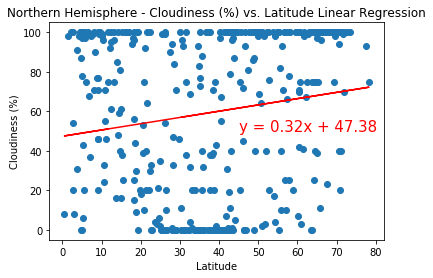

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north, cloud_north)
regress_values = north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north, cloud_north)
plt.plot(north, regress_values, "r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13839450227012615


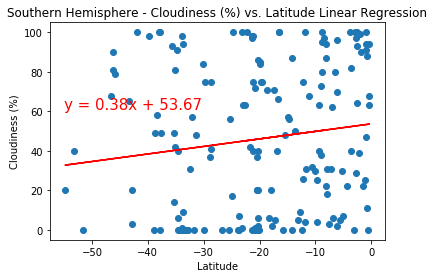

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south, cloud_south)
regress_values = south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south, cloud_south)
plt.plot(south, regress_values, "r-")
plt.annotate(line_eq,(-55,61),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig10.png')

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11529799710462876


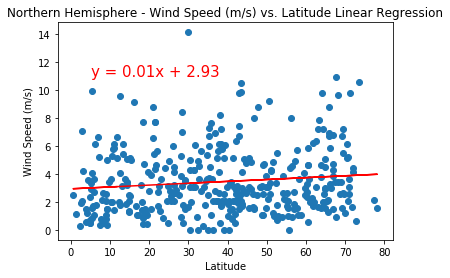

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north, wind_north)
regress_values = north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north, wind_north)
plt.plot(north, regress_values, "r-")
plt.annotate(line_eq,(5,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19294536014155772


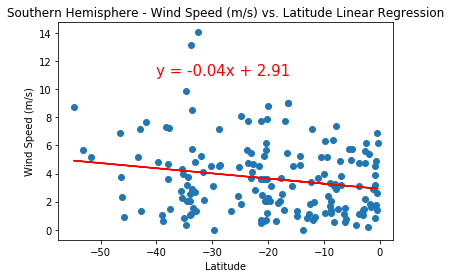

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south, wind_south)
regress_values = south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south, wind_south)
plt.plot(south, regress_values, "r-")
plt.annotate(line_eq,(-40,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/Fig12.png')